<a href="https://colab.research.google.com/github/danisshai/fastai-tests/blob/main/notebooks/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! [ -e /content ] && pip install -Uqq fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
im3_path = threes[1000]
im3 = Image.open(im3_path)
im3

In [9]:
tensor(im3)[:10,10:11]

tensor([[  0],
        [  0],
        [  0],
        [ 19],
        [226],
        [253],
        [183],
        [  0],
        [  0],
        [  0]], dtype=torch.uint8)

In [10]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt', 'font-style': 'italic'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,140,177,226,253,253,254,253,253,247,102,0,0,0,0
1,0,0,0,0,254,253,253,253,253,205,174,229,253,253,31,0,0,0
2,0,0,0,0,163,234,183,102,19,8,0,13,220,253,188,0,0,0
3,0,0,0,0,36,31,0,0,0,0,0,0,136,253,195,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,137,254,196,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,44,228,253,195,0,0,0
6,0,0,0,0,0,0,25,79,79,79,124,229,253,253,128,0,0,0
7,0,0,0,0,47,182,240,253,253,254,253,253,253,253,23,0,0,0
8,0,0,0,0,156,253,253,253,253,254,245,223,253,253,195,53,0,0
9,0,0,0,0,61,173,98,98,98,99,15,0,68,240,255,238,41,0


In [11]:

three_tensors = [tensor(Image.open(img)) for img in threes]
seven_tensors = [tensor(Image.open(img)) for img in sevens]

In [12]:
len(three_tensors),len(seven_tensors)

(6131, 6265)

<Axes: >

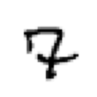

In [13]:
show_image(seven_tensors[2])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [15]:
stacked_threes.ndim

3

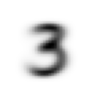

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

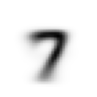

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

# Very basic classifier

In [18]:
((stacked_threes[1] - mean3).abs()).sum()/(mean3.shape[0]*mean3.shape[1])

tensor(0.1114)

(tensor(0.1114), tensor(0.2021))

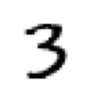

In [19]:
a_3 = stacked_threes[1]
show_image(a_3)
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

In [20]:
import torch.nn.functional as F

In [21]:
F.l1_loss(stacked_threes[1], mean3), F.mse_loss(stacked_threes[1], mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [22]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [23]:
(tensor ( [[1,2,3],[4,5,4]])[1:1]*1.5).type()

'torch.FloatTensor'

In [24]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(valid_3_tens, mean3).mean()

tensor(0.1296)

In [26]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [27]:
is_3(valid_3_tens).float().mean(), 1- is_3(valid_7_tens).float().mean()

(tensor(0.9168), tensor(0.9854))

In [28]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [29]:
xt = tensor(3.).requires_grad_()

In [30]:
def f(x): return  x**2
z = f(xt)

In [31]:
z.backward()

In [32]:
xt.grad

tensor(6.)

In [33]:
xt = tensor([3.,4.,10.]).requires_grad_()
def f(x): return (x**2).sum()
yt = f(xt)
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [34]:
?torch.randn

# cuadratic function test

In [35]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

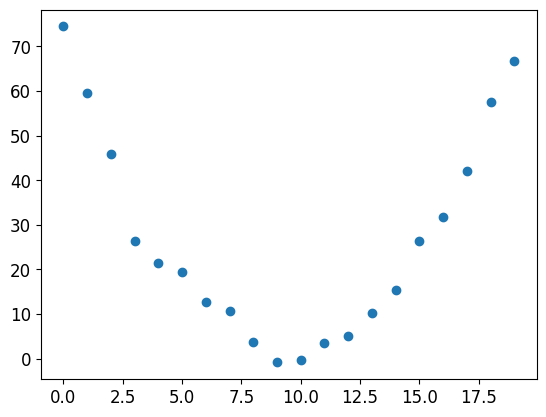

In [36]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [37]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [38]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [39]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [40]:
preds = f(time, params)

predictions:

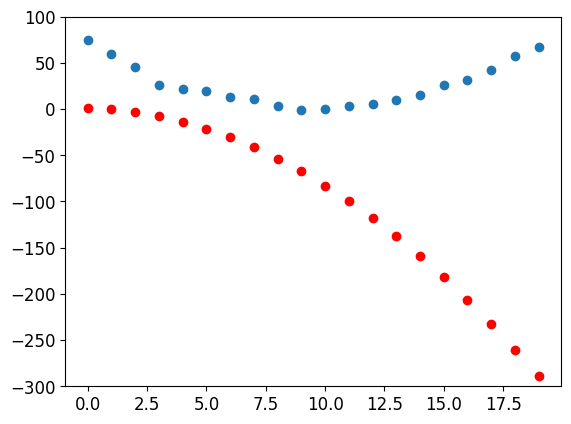

In [41]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

In [42]:
loss = mse(preds, speed)


In [43]:
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [44]:
loss.backward()


In [45]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [46]:
lr = 1e-5
params.data -= lr * params.grad.data


In [47]:
params.grad = None

In [48]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

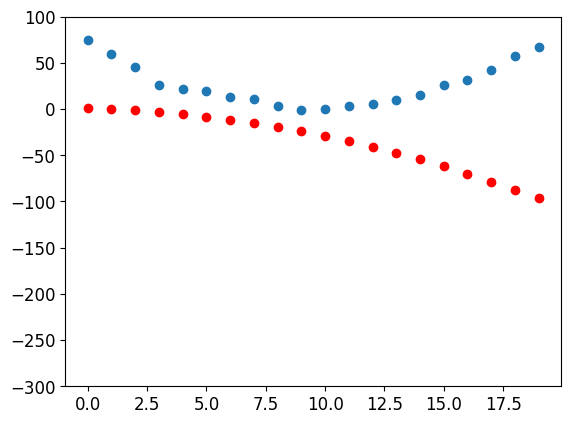

In [49]:
show_preds(preds)

In [50]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [51]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


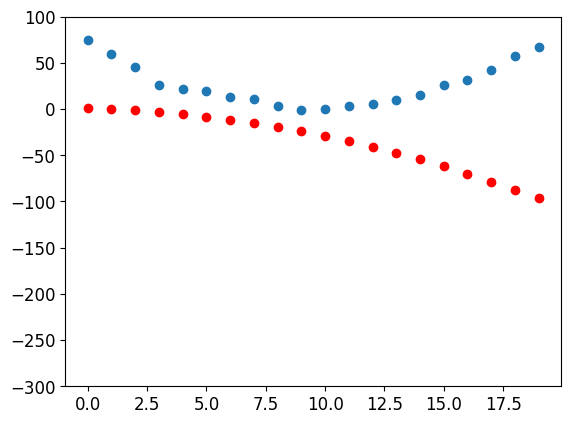

In [52]:
show_preds(preds)

In [53]:
params = orig_params.detach().requires_grad_()

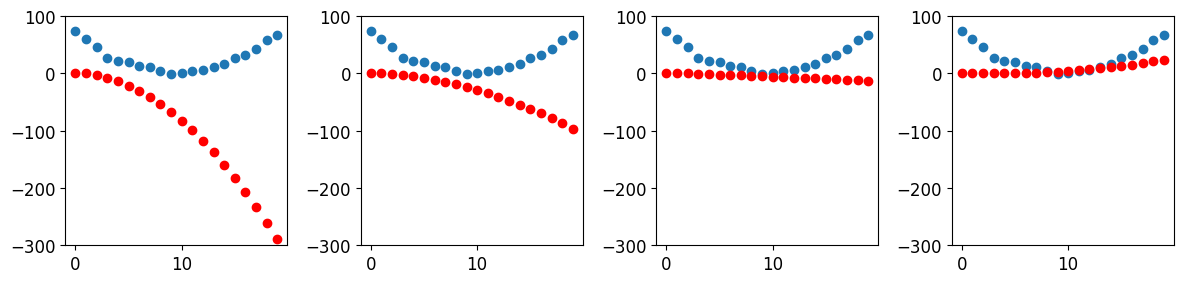

In [54]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [55]:
torch.tensor([ 0.1943, -0.7342,  0.0796, -6])

tensor([ 0.1943, -0.7342,  0.0796, -6.0000])

In [56]:
params2 = torch.tensor([ 0.1943, -0.7342,  0.0796, -6]).requires_grad_()
orig_params2 = params2.clone()

In [57]:
params2

tensor([ 0.1943, -0.7342,  0.0796, -6.0000], requires_grad=True)

In [58]:
lr = 1e-5

In [59]:


def mse(preds, targets): return ((preds-targets)**2).mean()

def f2(x, params):
  a,b,c,d = params
  return a*(x+d)**2+(x+d)*b+c
def apply_step2(params, prn=True):
    preds = f2(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

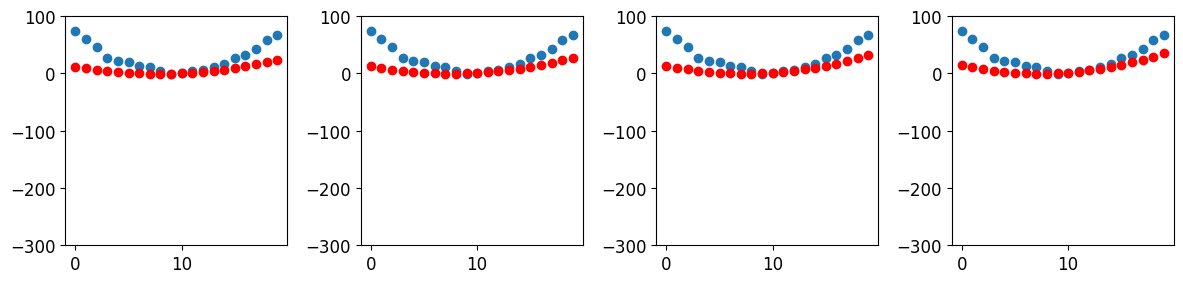

In [60]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step2(params2, False), ax)
plt.tight_layout()

In [61]:

for i in range(1000): apply_step2(params2)

544.29345703125
516.9154052734375
494.32373046875
475.6742248535156
460.2710876464844
447.5408630371094
437.0111389160156
428.292724609375
421.06512451171875
415.06439208984375
410.0732421875
405.91259765625
402.4353942871094
399.5203857421875
397.06781005859375
394.9956970214844
393.23638916015625
391.73443603515625
390.4441223144531
389.3279113769531
388.3548583984375
387.4994812011719
386.74102783203125
386.06219482421875
385.44879150390625
384.88922119140625
384.3739318847656
383.89508056640625
383.44610595703125
383.021728515625
382.6176452636719
382.2300109863281
381.85626220703125
381.49359130859375
381.1401062011719
380.79425048828125
380.45458984375
380.1199951171875
379.7895812988281
379.4625549316406
379.13836669921875
378.81640625
378.496337890625
378.17779541015625
377.86041259765625
377.54400634765625
377.22845458984375
376.91357421875
376.5991516113281
376.2851257324219
375.97149658203125
375.6579284667969
375.34466552734375
375.031494140625
374.7184143066406
374.4054260

# Back to Mnist

In [62]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [63]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [64]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [65]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [66]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [67]:
weights = init_params((28*28,1))
bias = init_params(1)

In [68]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [69]:
(train_x*weights.T).sum(1).unsqueeze(1)+bias

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [70]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [71]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [72]:
corrects.float().mean().item()

0.4912068545818329

In [73]:
with torch.no_grad(): weights[0] *= 1.0001

In [74]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [75]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [76]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [77]:
mnist_loss(trgts, prds)

RuntimeError: ignored

In [ ]:
help(torch.where)

In [87]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [88]:
def sigmoid(x): return 1/(1+torch.exp(-x))

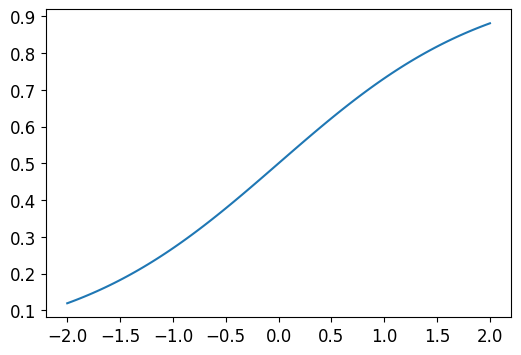

In [89]:
plot_function(sigmoid)

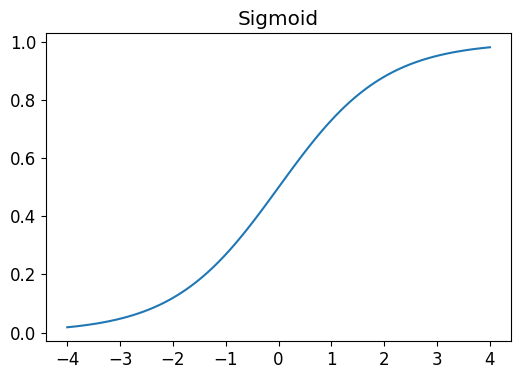

In [90]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [91]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [92]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [93]:
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [94]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [95]:
dl = DataLoader(ds, batch_size=5)
list(dl)

[(tensor([0, 1, 2, 3, 4]), ('a', 'b', 'c', 'd', 'e')),
 (tensor([5, 6, 7, 8, 9]), ('f', 'g', 'h', 'i', 'j')),
 (tensor([10, 11, 12, 13, 14]), ('k', 'l', 'm', 'n', 'o')),
 (tensor([15, 16, 17, 18, 19]), ('p', 'q', 'r', 's', 't')),
 (tensor([20, 21, 22, 23, 24]), ('u', 'v', 'w', 'x', 'y')),
 (tensor([25]), ('z',))]

In [96]:
weights = init_params((28*28,1))
bias = init_params(1)

In [97]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [98]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [99]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [100]:
preds = linear1(batch)
preds

tensor([[  2.8183],
        [ -0.1760],
        [-10.4714],
        [  3.3961]], grad_fn=<AddBackward0>)

In [101]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.4082, grad_fn=<MeanBackward0>)

In [102]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0121), tensor([-0.0832]))

In [103]:
def calc_grad(xb, yb, model):
    weights.grad.zero_()
    bias.grad.zero_();
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0832]))

In [104]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [105]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [106]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [107]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [108]:
validate_epoch(linear1)

0.5464

In [109]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6542

In [110]:
for i in range(1):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1))

0.8812


# Using Optimizer

In [111]:
linear_model = nn.Linear(28*28,1)

In [112]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [113]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [114]:
opt = BasicOptim(linear_model.parameters(), lr)

In [115]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [116]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [117]:
train_model(linear_model, 10)

0.4932 0.8471 0.8374 0.9106 0.9326 0.9468 0.956 0.9629 0.9658 0.9673 

In [118]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
opt = BasicOptim(linear_model.parameters(), lr)
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
validate_epoch(linear_model)
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')
train_model(linear_model, 20)

0.4932 0.8701 0.8296 0.9111 0.9341 0.9468 0.9555 0.9619 0.9653 0.9678 0.9697 0.9717 0.9741 0.9751 0.9761 0.9765 0.977 0.9775 0.978 0.9785 

# fastai SGD and FIT


In [119]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8603 0.8291 0.9101 0.9321 0.9458 0.956 0.9619 0.9658 0.9673 0.9687 0.9712 0.9741 0.9746 0.9761 0.9761 0.9775 0.978 0.978 0.979 

In [120]:
dls = DataLoaders(dl, valid_dl)

In [121]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [122]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636910,0.503699,0.495584,00:00
1,0.625418,0.088840,0.942591,00:00
2,0.225163,0.274912,0.735034,00:00
3,0.097372,0.131012,0.888126,00:00
4,0.049841,0.088842,0.921001,00:00
5,0.031315,0.068755,0.940628,00:00
6,0.023686,0.056863,0.953386,00:00
7,0.020326,0.049142,0.959274,00:00
8,0.018663,0.043854,0.964671,00:00
9,0.017694,0.040051,0.966143,00:00


In [123]:
1+1

2

# Adding non linearity

In [78]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [79]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [131]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [85]:
list(nn.Linear(4,2).parameters())

[Parameter containing:
 tensor([[ 0.2652, -0.0247, -0.0195,  0.0182],
         [ 0.2699, -0.0601, -0.1785, -0.4613]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4261, -0.1795], requires_grad=True)]

In [133]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [134]:
learn.fit(n_epoch=30, lr=0.3)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.240444,0.470776,0.504416,00:01
1,0.106907,0.245825,0.769872,00:01
2,0.054241,0.119740,0.899902,00:00
3,0.034079,0.080514,0.929343,00:00
4,0.025307,0.062247,0.947007,00:00
5,0.021040,0.051516,0.956820,00:00
6,0.018699,0.044700,0.962709,00:00
7,0.017215,0.040111,0.966634,00:00
8,0.016153,0.036832,0.968106,00:00
9,0.015327,0.034384,0.970069,00:00


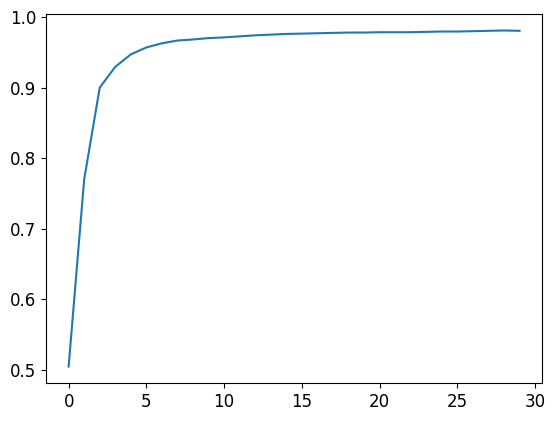

In [135]:
plt.plot(L(learn.recorder.values).itemgot(2));

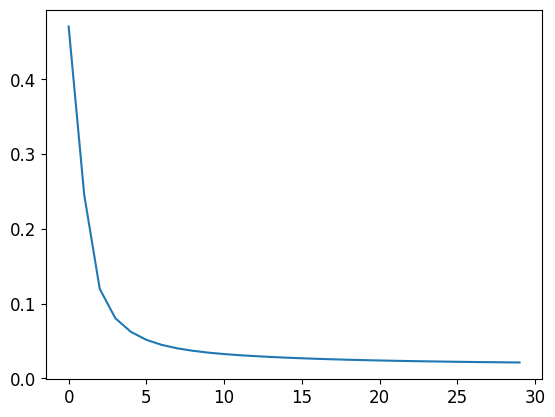

In [142]:
plt.plot(L(learn.recorder.values).itemgot(1))

In [143]:
print("Final Accuracy: ", learn.recorder.values[-1][2])

Final Accuracy:  0.9803729057312012


In [144]:
L([1,2,3])

(#3) [1,2,3]

In [153]:
[x*2 if not x%2==0 else x  for x in  list(range(15)) ]

[0, 2, 2, 6, 4, 10, 6, 14, 8, 18, 10, 22, 12, 26, 14]

In [154]:
def func(a , b):
  return list(zip(a,b))

func([1,2,3], "abc")

[(1, 'a'), (2, 'b'), (3, 'c')]

# implementation with all numbers - this implementation will be made on another notebook


In [155]:
path = untar_data(URLs.MNIST)

In [162]:
Tensor(Image.open((path/"training"/"6").ls()[0]))

TypeError: ignored

In [ ]:
[]